<h1>Decision Tree Step by Step</h1>

https://scikit-learn.org/stable/modules/tree.html

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import math
import time
import random
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 

def fmt(x): return ('%.6f' % x).rjust(9)
def pnt(x): return ('{:.2f}%'.format(x*100)).rjust(4)

import sys
sys.path.append('../data')
from mylib import *
toPrint=False

<h3>Utility functions</h3>

In [4]:
def ConfusionTable(y_pred, y_test):
    XP=pd.DataFrame({'pred':y_pred, 'test':y_test, 'one':1})
    pt=XP.pivot_table(values='one', columns='pred', index='test',  aggfunc='count')
    pt=pt.replace(np.nan, 0)
    pt=pt.sort_index(axis=0,ascending=False).sort_index(axis=1,ascending=False)
    if pt.shape==(2,2):
        print("Accuracy: ", pnt((pt.iloc[0,0]+pt.iloc[1,1])/(pt.iloc[0,0]+pt.iloc[0,1]+pt.iloc[1,0]+pt.iloc[1,1])),
         "     Recall:   ", pnt(pt.iloc[0,0]/(pt.iloc[0,0]+pt.iloc[0,1])))
        print("Precision:", pnt(pt.iloc[0,0]/(pt.iloc[0,0]+pt.iloc[1,0])),
         "     F1 score: ", pnt(pt.iloc[0,0]*2/(pt.iloc[0,0]*2+pt.iloc[0,1]+pt.iloc[1,0])))
    display(pt)

def sample(df, testRatio):
    selector=np.array([random.uniform(0,1)>=testRatio for i in range(df.shape[0])])
    X_train=df[selector]
    X_train.index=range(X_train.shape[0])
    X_test=df[selector==False]
    X_test.index=range(X_test.shape[0])
    return X_train, X_test 

x1=np.array([1,2,1,2,1,2,1,2])
x2=np.array([1,1,1,1,2,2,2,2])
ConfusionTable(x1, x2)

Accuracy:  50.00%      Recall:    50.00%
Precision: 50.00%      F1 score:  50.00%


pred,2,1
test,,
2,2,2
1,2,2


In [6]:
data= pd.read_csv('/Users/dongwenou/Downloads/Intro to DS/playTennis.csv')
data

,Outlook,Temperature,Humidity,Windy,Play
0,sunny,hot,high,False,No
1,sunny,hot,high,True,No
2,overcast,hot,high,False,Yes
3,rain,mild,high,False,Yes
4,rain,cool,Noormal,False,Yes
5,rain,cool,Noormal,True,No
6,overcast,cool,Noormal,True,Yes
7,sunny,mild,high,False,No
8,sunny,cool,Noormal,False,Yes
9,rain,mild,Noormal,False,Yes


### Split the dataframe according to an attribute

In [10]:
df=data
attrib='Humidity'
outDFs=[]
for v in set(df[attrib]):
    outDFs.append(df[df[attrib]==v])
print('outDFs is a list of ', len(outDFs), 'DataFrame(s):')
outDFs

outDFs is a list of  2 DataFrame(s):


[     Outlook Temperature Humidity  Windy Play
 4       rain        cool  Noormal  False  Yes
 5       rain        cool  Noormal   True   No
 6   overcast        cool  Noormal   True  Yes
 8      sunny        cool  Noormal  False  Yes
 9       rain        mild  Noormal  False  Yes
 10     sunny        mild  Noormal   True  Yes
 12  overcast         hot  Noormal  False  Yes,
      Outlook Temperature Humidity  Windy Play
 0      sunny         hot     high  False   No
 1      sunny         hot     high   True   No
 2   overcast         hot     high  False  Yes
 3       rain        mild     high  False  Yes
 7      sunny        mild     high  False   No
 11  overcast        mild     high   True  Yes
 13      rain        mild     high   True   No]

### Spliting the data recursively
<br>
<font style='font-size:18px; line-height:28px;'>
For making multiple splitings, we need to consolidate the output data and the input data in a consistent format, in the next code segment, the dataframe were put into a list, and the output is also a list of dataframe. The feature used for spliting and its values are all accumulated into a field '_by_'.
    
By spliting the data in different way, we want to find whether certain spliting can give us an un-ambiguous outcome, we also hope the number of splitting can be reduced to mimimum.
</font>

In [152]:
dfs=[data.copy()]   ### make a list of DataFrame, copy its value so adding column will not effect the original data
dfs[0]['_by_']=np.empty(data.shape[0], dtype=str)
dfs

[     Outlook Temperature Humidity  Windy Play _by_
 0      sunny         hot     high  False   No     
 1      sunny         hot     high   True   No     
 2   overcast         hot     high  False  Yes     
 3       rain        mild     high  False  Yes     
 4       rain        cool  Noormal  False  Yes     
 5       rain        cool  Noormal   True   No     
 6   overcast        cool  Noormal   True  Yes     
 7      sunny        mild     high  False   No     
 8      sunny        cool  Noormal  False  Yes     
 9       rain        mild  Noormal  False  Yes     
 10     sunny        mild  Noormal   True  Yes     
 11  overcast        mild     high   True  Yes     
 12  overcast         hot  Noormal  False  Yes     
 13      rain        mild     high   True   No     ]

In [14]:
def splitByFeature(dfs, attrib):
    print("\n>>>> split by ",attrib)
    outDFs=[]
    for df in dfs:
        values=set(df[attrib])
        cols=sorted(list(set(df.columns)-{attrib}))
        for v in values:
            print('------------',v,'-------------')
            subdf=df[cols][df[attrib]==v]
            subdf['_by_'] +=attrib+'='+str(v)+' '
            print(subdf)
            outDFs.append(subdf)
    return outDFs

dfs=[data.copy()]   ### make a list of DataFrame, copy its value so adding column will not effect the original data
dfs[0]['_by_']=np.empty(data.shape[0], dtype=str)  ## create a new column of string type. 
dfs=splitByFeature(dfs,'Humidity')
dfs=splitByFeature(dfs,'Outlook')
dfs=splitByFeature(dfs,'Temperature')
#df=splitByFeature(dfs,'Windy')


>>>> split by  Humidity
------------ Noormal -------------
     Outlook Play Temperature  Windy               _by_
4       rain  Yes        cool  False  Humidity=Noormal 
5       rain   No        cool   True  Humidity=Noormal 
6   overcast  Yes        cool   True  Humidity=Noormal 
8      sunny  Yes        cool  False  Humidity=Noormal 
9       rain  Yes        mild  False  Humidity=Noormal 
10     sunny  Yes        mild   True  Humidity=Noormal 
12  overcast  Yes         hot  False  Humidity=Noormal 
------------ high -------------
     Outlook Play Temperature  Windy            _by_
0      sunny   No         hot  False  Humidity=high 
1      sunny   No         hot   True  Humidity=high 
2   overcast  Yes         hot  False  Humidity=high 
3       rain  Yes        mild  False  Humidity=high 
7      sunny   No        mild  False  Humidity=high 
11  overcast  Yes        mild   True  Humidity=high 
13      rain   No        mild   True  Humidity=high 

>>>> split by  Outlook
------------

<font style='font-size:18px; line-height:28px;'>
    We can see if the data were divided by <b>Humidity,Outlook,Windy</b>, the outcome (play tennis or not) is clearly identified and we have constructed a decision tree:
<pre>
                                         Humidity
                       normal----------------+---------------high
                          |                                   |
                       Outlook                             Outlook
                          |                                   |                       
           overcast-----rain-------sunny       overcast----- rain-------sunny
               |          |          |             |          |           |
              p(2)      Windy      p(2)          p(2)       Windy       n(3)
                          |                                   |
                  False---+---True                    False---+---True
                    |          |                        |          |                                     
                   p(2)      n(1)                      p(1)       n(1)                                
                  
</pre>
</font>

### A different split

In [16]:
dfs=[data.copy()]   ### make a list of DataFrame, copy its value so adding column will not effect the original data
dfs[0]['_by_']=np.empty(data.shape[0], dtype=str) 
dfs=splitByFeature(dfs,'Outlook')
dfs=splitByFeature(dfs,'Humidity')
dfs=splitByFeature(dfs,'Temperature')
for i in dfs:
    print('----------')
    print(i)


>>>> split by  Outlook
------------ overcast -------------
   Humidity Play Temperature  Windy               _by_
2      high  Yes         hot  False  Outlook=overcast 
6   Noormal  Yes        cool   True  Outlook=overcast 
11     high  Yes        mild   True  Outlook=overcast 
12  Noormal  Yes         hot  False  Outlook=overcast 
------------ sunny -------------
   Humidity Play Temperature  Windy            _by_
0      high   No         hot  False  Outlook=sunny 
1      high   No         hot   True  Outlook=sunny 
7      high   No        mild  False  Outlook=sunny 
8   Noormal  Yes        cool  False  Outlook=sunny 
10  Noormal  Yes        mild   True  Outlook=sunny 
------------ rain -------------
   Humidity Play Temperature  Windy           _by_
3      high  Yes        mild  False  Outlook=rain 
4   Noormal  Yes        cool  False  Outlook=rain 
5   Noormal   No        cool   True  Outlook=rain 
9   Noormal  Yes        mild  False  Outlook=rain 
13     high   No        mild   Tr

In [155]:
dfs=[data.copy()]   ### make a list of DataFrame, copy its value so adding column will not effect the original data
dfs[0]['_by_']=np.empty(data.shape[0], dtype=str) 
dfs=splitByFeature(dfs,'Outlook')


>>>> split by  Outlook
------------ overcast -------------
   Humidity Play Temperature  Windy               _by_
2      high  Yes         hot  False  Outlook=overcast 
6   Noormal  Yes        cool   True  Outlook=overcast 
11     high  Yes        mild   True  Outlook=overcast 
12  Noormal  Yes         hot  False  Outlook=overcast 
------------ rain -------------
   Humidity Play Temperature  Windy           _by_
3      high  Yes        mild  False  Outlook=rain 
4   Noormal  Yes        cool  False  Outlook=rain 
5   Noormal   No        cool   True  Outlook=rain 
9   Noormal  Yes        mild  False  Outlook=rain 
13     high   No        mild   True  Outlook=rain 
------------ sunny -------------
   Humidity Play Temperature  Windy            _by_
0      high   No         hot  False  Outlook=sunny 
1      high   No         hot   True  Outlook=sunny 
7      high   No        mild  False  Outlook=sunny 
8   Noormal  Yes        cool  False  Outlook=sunny 
10  Noormal  Yes        mild   Tru

In [156]:
df1=splitByFeature([dfs[2]],'Humidity')


>>>> split by  Humidity
------------ high -------------
  Play Temperature  Windy                          _by_
0   No         hot  False  Outlook=sunny Humidity=high 
1   No         hot   True  Outlook=sunny Humidity=high 
7   No        mild  False  Outlook=sunny Humidity=high 
------------ Noormal -------------
   Play Temperature  Windy                             _by_
8   Yes        cool  False  Outlook=sunny Humidity=Noormal 
10  Yes        mild   True  Outlook=sunny Humidity=Noormal 


In [157]:
df2=splitByFeature([dfs[0]],'Windy')


>>>> split by  Windy
------------ False -------------
   Humidity Play Temperature                           _by_
2      high  Yes         hot  Outlook=overcast Windy=False 
12  Noormal  Yes         hot  Outlook=overcast Windy=False 
------------ True -------------
   Humidity Play Temperature                          _by_
6   Noormal  Yes        cool  Outlook=overcast Windy=True 
11     high  Yes        mild  Outlook=overcast Windy=True 


<font style='font-size:18px; line-height:28px;'>
This yields another decision tree, This seems to be a simpler classification

<pre>
                               Outlook      
                                  |                                     
            overcast------------rain----------------------sunny 
                |                 |                         |   
               p(4)             Windy                    Humidity  
                                  |                         |
                          False---+---True        normal----+-----high     
                            |          |            |              |                 
                           p(3)      n(2)          p(2)          n(3)                 
</pre>

This decision tree can be expressed as a logical expression :
<b><br>
$\quad$ ((Outlook == 'Sunny')$\cap$(Humidity == 'Normal')) $\cup$ (Outlook=='Overcast') $\cup$ ((Outlook=='Rain') $\cap$ (Windy==False))
</b>

</font>

<font style='font-size:18px; line-height:28px;'>
Many questions arose from above examples:
<ol>
    <li>How to determind which attribute to use for a split?
    <li>How to determind whether to conduct a split?
    <li>How to reduce the total number of splits while keeping the prediction correct?
    <li>Should all the data point be fitted? Is it possible? What about the noisy training data?
    <li>What is some attributes are numeric, such as the temperature measurements?
</ol>

<h3>Entropy</h3>
<ul>
<li>The entropy is a measure of the uncertainty associated with a random variable 
<li>As uncertainty and or randomness increases for a result set so does the entropy values
<li>Values range [0,1] to represent the entropy of information 
</ul>
$$
Entropy(S)=-\sum p_i Log_{2} (p_i)
$$
We can compute the entropy of playTennis dataset with respect to the outcome variable:

$$Entropy(rootNode) = -(9/14)log2(9/14) - (5/14)log2(5/14)=0.940$$

When number of classes is 2, entropy is measured between 0 and 1. Entropy can be greater than 1 when there are more than two classes than 2. It is easy to prove that the maximum entropy for $j$ classes random variable is 

$$ max Entropy(S)=-\sum_{i=1}^j p_i Log_{2} (p_i) = -Log_{2} (1/j)= Log_{2} (j)$$

the highest entropy occures when the random variable is most diversely distributed, i.e. every class has equal occurance. We can drive the maximum entropy from above equality for j=2,4,8,16,32,64,128 are 1,2,3,4,5,6,7, respectively.
</fomt>

Text(0.5, 0, 'p')

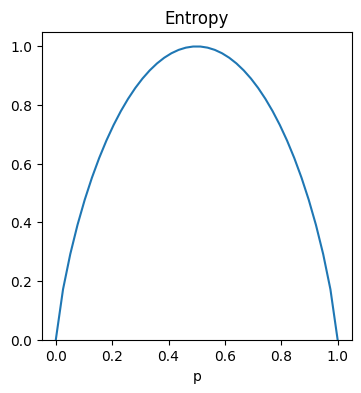

In [18]:
x=np.linspace(0,1,40)
ent=[0]+[-(p*math.log(p,2)+(1-p)*math.log(1-p,2)) for p in x[1:-1]]+[0]
plt.subplots(figsize=(4,4))
plt.plot(x,ent)
plt.ylim(0,1.05)
plt.title('Entropy')
plt.xlabel('p')

In [20]:
import math
df=data.copy()
outcomeVar='Play'
values=list(set(df[outcomeVar])) # get all labels from outcome variable
nd=df.shape[0]
col=list(df[outcomeVar])
ent=0.0  # accumulator for the entropy
for v in values:
    ratio=float(col.count(v)/nd)
    #print(col.count(v))
    ent+=ratio*math.log(ratio,2)
print(-ent)

0.9402859586706309


In [22]:
def entropy(df):
    col=list(df[outcomeVar])
    values=set(col)
    if len(values)<=1: return 0
    ntotal=df.shape[0]
    ent=0.0
    for v in values:
        ratio=float(col.count(v)/ntotal)
        ent+=ratio*math.log(ratio,2)
    return -ent

#outcomeVar='Play'
totalEntropy = entropy(df)
print(totalEntropy)

0.9402859586706309


<h3>Information Gain</h3>

<font style='font-size:18px; line-height:28px;'>
<br>
Information gain is the expected reduction in entropy casused by partitioning the dataset according to an attribute.
</ul>
$$
Gain(S,A)=Entropy(S)-\sum_{v\in Values(A)} \frac{N(S_v)}{N(S)}Entropy(S_v)
$$

Compute information gain for each attribute:

In [161]:
df

,Outlook,Temperature,Humidity,Windy,Play
0,sunny,hot,high,False,No
1,sunny,hot,high,True,No
2,overcast,hot,high,False,Yes
3,rain,mild,high,False,Yes
4,rain,cool,Noormal,False,Yes
5,rain,cool,Noormal,True,No
6,overcast,cool,Noormal,True,Yes
7,sunny,mild,high,False,No
8,sunny,cool,Noormal,False,Yes
9,rain,mild,Noormal,False,Yes


In [46]:
for i in df.groupby('Windy'):
    print(i[0])

#遍历 groupby 返回的对象，i 是一个包含两部分的元组 (key, group)：
#	1.	key：分组的键值（即 'Windy' 列中的一个唯一值）。
#	2.	group：与该键对应的子数据框。

False
True


In [48]:
i

(True,
      Outlook Temperature Humidity  Windy Play
 1      sunny         hot     high   True   No
 5       rain        cool  Noormal   True   No
 6   overcast        cool  Noormal   True  Yes
 10     sunny        mild  Noormal   True  Yes
 11  overcast        mild     high   True  Yes
 13      rain        mild     high   True   No)

In [50]:
### use the groupby method to avoid repeatedly construction of dataframe
def trySplit(df,attrib):
    ntotal=df.shape[0]
    ent=0.0
    for v, nodei in df.groupby(attrib):
        ent+=float(nodei.shape[0]/ntotal)*entropy(nodei) #比例*entropy
    return ent

print(trySplit(df,'Windy'))
gain = totalEntropy - trySplit(df,'Windy')
print(gain)

0.8921589282623617
0.04812703040826927


In [165]:
0.94-(-8/14*(1/4*math.log(1/4,2)+3/4*math.log(3/4,2))-6/14*((1/2*math.log(1/2,2)+1/2*math.log(1/2,2))))

0.0478410717376383

$$
Gain(S,Windy) = Entropy(S)-(8/14)Entropy(S_{false}) - (6/14)Entropy(S_{true}) =0.048
$$

In [52]:
print(trySplit(df,'Humidity'))
gain = totalEntropy - trySplit(df,'Humidity')
print(gain)

0.7884504573082896
0.15183550136234136


In [54]:
print(trySplit(df,'Temperature'))
gain = totalEntropy - trySplit(df,'Temperature')
print(gain)

0.9110633930116763
0.029222565658954647


In [56]:
print(trySplit(df,'Outlook'))
gain = totalEntropy - trySplit(df,'Outlook')
print(gain)

0.6935361388961918
0.2467498197744391


In [58]:
def getMostInfoGainAttrib(df, toPrint=False):
    TheEntropy=entropy(df)
    InfoGains=pd.Series()
    for v in df.columns:
        if v!=outcomeVar:
            InfoGains[v]=TheEntropy-trySplit(df,v)
    if toPrint: print(InfoGains)
    if len(InfoGains)==0: return None
    #print(InfoGains)
    return InfoGains.index[InfoGains.argmax()]
getMostInfoGainAttrib(df)

'Outlook'

In [60]:
df=pd.read_csv('/Users/dongwenou/Downloads/Intro to DS/playTennis.csv')
outcomeVar='Play'
X_train, X_test=sample(df, 0.2)
print("tarin set shape:", X_train.shape)
print("test set shape:", X_test.shape)
print("The attribute with highest Infomation Gain is: ", getMostInfoGainAttrib(df,True))

tarin set shape: (9, 5)
test set shape: (5, 5)
Outlook        0.246750
Temperature    0.029223
Humidity       0.151836
Windy          0.048127
dtype: float64
The attribute with highest Infomation Gain is:  Outlook


## Build a decision tree recursively
<br>
<font style='font-size:18px; line-height:28px;'>
Many technical details need to be solved for a recursive solution to the decision tree classification:

- storage structure for tree
- how to represent a tree
- how to build the tree recursively
- how to add leaf nodes of a branch
- when the test data point is a vector and the model is a tree, how should be prediction be done?
</font>

#### recursive functions

In [62]:
##Example 1: A Fibonacci sequence is the integer sequence of 0, 1, 1, 2, 3, 5, 8
def recursive_fibonacci(n):
  if n <= 1:
      return n
  else:
      return(recursive_fibonacci(n-1) + recursive_fibonacci(n-2))
for k in range(10):
    print(recursive_fibonacci(k))

0
1
1
2
3
5
8
13
21
34


In [64]:
# Example 2: The factorial of 6 is denoted as 6! = 1*2*3*4*5*6 = 720
def recursive_factorial(n):
  if n == 1:
      return n
  else:
      return n * recursive_factorial(n-1)
recursive_factorial(6)

720

In [66]:
def ftn1(n,i=0):
    i+=2
    if n==1:
        return i
    else:
        return ftn1(n-1,i)
ftn1(9,i=0)

18

#### Tree storage

In [68]:
# Tree structure is often constructed with dictionary
a={'a':{}}
a['a']['a1']=1
a['a']['a2']=2

b={'b':{}}
b['b']['b1']=10
b['b']['b2']=20

d={'d':{}}
d['d']['d1']=a
d['d']['d2']=2.2
d['d']['d3']=b

d

{'d': {'d1': {'a': {'a1': 1, 'a2': 2}},
  'd2': 2.2,
  'd3': {'b': {'b1': 10, 'b2': 20}}}}

### How to represent a tree structure
<br>
<font style='font-size:18px; line-height:28px;'>
Many methods exist to represent the tree structure, we are using a simlest way. The function printTree() recursively presents each node of the tree. 
</font>

In [70]:
def printTree(dic, nspace=0):
    nspace+=2
    if type(dic) is dict:
        for key in dic.keys():
            #print("\n",key)
            print('\n', ' '*nspace, key, ":", end='', sep='')
            printTree(dic[key], nspace)
        #nspace-=20
    else:
        print(dic, end=' ', sep='')
printTree(d)


  d:
    d1:
      a:
        a1:1 
        a2:2 
    d2:2.2 
    d3:
      b:
        b1:10 
        b2:20 

In [74]:
a={"b":{'a1': 1, 'a2': 2}}
print(type(a))
printTree(a)

<class 'dict'>

  b:
    a1:1 
    a2:2 

In [223]:
printTree(a['b'])


  a1:1 
  a2:2 

In [76]:
printTree(a['b']["a1"])

1 

### Building a recursive tree 

In [80]:
def value_count(vals):
    return np.unique(vals, return_counts=True) #启用时，除了返回唯一值，还会返回每个唯一值的出现次数。
value_count(np.random.choice(5,1000)) #生成一个长度为 1000 的随机整数数组，每个整数从 [0, 1, 2, 3, 4] 中随机选择。

(array([0, 1, 2, 3, 4]), array([216, 226, 174, 198, 186]))

In [82]:
for i,j in df.groupby('Outlook'):
    print(i)
    print(j)

overcast
     Outlook Temperature Humidity  Windy Play
2   overcast         hot     high  False  Yes
6   overcast        cool  Noormal   True  Yes
11  overcast        mild     high   True  Yes
12  overcast         hot  Noormal  False  Yes
rain
   Outlook Temperature Humidity  Windy Play
3     rain        mild     high  False  Yes
4     rain        cool  Noormal  False  Yes
5     rain        cool  Noormal   True   No
9     rain        mild  Noormal  False  Yes
13    rain        mild     high   True   No
sunny
   Outlook Temperature Humidity  Windy Play
0    sunny         hot     high  False   No
1    sunny         hot     high   True   No
7    sunny        mild     high  False   No
8    sunny        cool  Noormal  False  Yes
10   sunny        mild  Noormal   True  Yes


In [86]:
def splitNodes(df, treeNode):
    attrib=getMostInfoGainAttrib(df)
    if attrib==None: return
    treeNode[attrib]=dict() #分裂点，给予空字典
    if toPrint: print("\n>>>>> split by ",attrib,)
    for v, subdf in df.groupby(attrib):
        theEntropy=entropy(subdf) 
        if theEntropy!=0 and subdf.shape[1]>2: #有entropy且特征数大于2
            if toPrint: 
                print(attrib, '=',v, theEntropy,'. Calling splitNodes() recursively')
                print(subdf)
            treeNode[attrib][v]={}
            splitNodes(subdf.drop(attrib, axis=1), treeNode[attrib][v]) #删除该特征列，开始迭代
        else:
            if toPrint: print(attrib,'=', v, 'leaf node', [(v.shape[0],k) for k,v in subdf.groupby(outcomeVar)])                 
            treeNode[attrib][v]=value_count(subdf[outcomeVar])
    del df

toPrint=True#True
df=pd.read_csv('/Users/dongwenou/Downloads/Intro to DS/playTennis.csv')
outcomeVar='Play'

theTree=dict()
splitNodes(df, theTree)
printTree(theTree)
#第一个overcast是因为label都是yes所以entropy为0跳到else
#如果列数小于或等于 2，则只有目标变量和一个可能的特征，无法继续分裂。
	#•	只有当列数大于 2 时，才有足够的特征来选择分裂点。


>>>>> split by  Outlook
Outlook = overcast leaf node [(4, 'Yes')]
Outlook = rain 0.9709505944546686 . Calling splitNodes() recursively
   Outlook Temperature Humidity  Windy Play
3     rain        mild     high  False  Yes
4     rain        cool  Noormal  False  Yes
5     rain        cool  Noormal   True   No
9     rain        mild  Noormal  False  Yes
13    rain        mild     high   True   No

>>>>> split by  Windy
Windy = False leaf node [(3, 'Yes')]
Windy = True leaf node [(2, 'No')]
Outlook = sunny 0.9709505944546686 . Calling splitNodes() recursively
   Outlook Temperature Humidity  Windy Play
0    sunny         hot     high  False   No
1    sunny         hot     high   True   No
7    sunny        mild     high  False   No
8    sunny        cool  Noormal  False  Yes
10   sunny        mild  Noormal   True  Yes

>>>>> split by  Humidity
Humidity = Noormal leaf node [(2, 'Yes')]
Humidity = high leaf node [(3, 'No')]

  Outlook:
    overcast:(array(['Yes'], dtype=object), array([4]

### How prediction work ?
<br>
<font style='font-size:18px; line-height:28px;'>
During the prediction, we try to match a testing data point in vector form against the tree structure. We will use the top-down method to travel through the tree, each non-leaf node represents the spliting with a feature (variable), we then get the value of the same variable in the testing vector, and use it determine which branches of the current node should we turn to. 
</font>

In [239]:
d

{'d': {'d1': {'a': {'a1': 1, 'a2': 2}},
  'd2': 2.2,
  'd3': {'b': {'b1': 10, 'b2': 20}}}}

dict

In [251]:
def ft(a):
    return 
ft(232413)

In [88]:
type(d['d'].get('d1'))
d

{'d': {'d1': {'a': {'a1': 1, 'a2': 2}},
  'd2': 2.2,
  'd3': {'b': {'b1': 10, 'b2': 20}}}}

In [90]:
ddd = {"a":{"a1":1},"b":{"b1":2}}

In [96]:
print(next(iter(ddd)))

a


In [98]:
kk = ddd.get("aa")
kk

In [118]:
#the above code is close enough for a recursive prediction function, 
#it take a dictionary and predict the testing point's 

# iter() 函数将字典 dic 转化为一个迭代器。
# 字典默认迭代的是 键，所以 iter(dic) 是一个迭代器，能按顺序返回字典的键。迭代顶层

def predict(dic, x_test):
    if len(dic)==0: return 
    field=next(iter(dic))
    if field not in x_test: return #如果 x_test 中缺少该特征值（数据不完整），直接返回 None
    match=dic[field].get(x_test[field])
    #•	x_test[field]：获取测试样本中当前特征的值。
	#•	dic[field]：当前节点的子字典，存储了特征值与对应子树或叶节点的映射关系。
	#•	dic[field].get(x_test[field])：
	#•	根据测试样本的特征值，查找对应的子树（或叶节点），如果没有匹配的分支，match 为 None。
    
    #print("--------","\n")
    #print(match)#match 了关键字后返回value字典
    
    if match is None: 
        return None  ## doing so will cause some test data point unidentified.
        #return totalValueCount(dic[field])  ### get the total counts of current node
    if type(match) is dict:
        if toPrint: print(match)  # match is a shorted dictionary so it can be treated just like the dic
        return predict(match, x_test)
    else:
        if toPrint: print(match, 'is a leaf of type ', type(match))
        return match

toPrint=False
x_test=df.iloc[0,:]
print(x_test)
print(predict(theTree, x_test))
#printTree(theTree)

Outlook        sunny
Temperature      hot
Humidity        high
Windy          False
Play              No
Name: 0, dtype: object
(array(['No'], dtype=object), array([3]))


In [112]:
predict(theTree, x_test)[0][0]

-------- 

{'Humidity': {'Noormal': (array(['Yes'], dtype=object), array([2])), 'high': (array(['No'], dtype=object), array([3]))}}
-------- 

(array(['No'], dtype=object), array([3]))


'No'

In [120]:
## validate with the y used in the training
toPrint=False
predicted=[]
for i in range(df.shape[0]):
    X_test=df.iloc[i,:]
    #print(X_test)
    predicted.append(predict(theTree, X_test)[0][0])
#printTree(theTree)
print(predicted)
print('all',sum(np.array(predicted)==df.Play), 'prediction are the same')

['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
all 14 prediction are the same


### Large data

In [280]:
data=pd.read_pickle("../data/malawi_clear.zip")
data=data.iloc[:1000,:]

In [284]:
data=data.reset_index()
selected_columns=['der_hhsize', 'hld_rooms', 'hld_nbcellpho'] ## for a smaller model
X=data[selected_columns]
outcomeVar='poor'
y=data[outcomeVar]
toPrint=False

np.random.seed(0)
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3)
print(X_train.shape, X_test.shape)
XY_train=X_train.merge(y_train, left_index=True, right_index=True)
theTree={}
splitNodes(XY_train,theTree)

for i in range(X_test.shape[0]): ## using the test data
    xtest=X_test.iloc[i,:]
    pred=predict(theTree, xtest)
    if pred==None:  ## print out the position if the item can't be resolved completely
        print('item', i,"can't be matched completely" )
        print(xtest)
printTree(theTree)

## cross check for the ietm with the tree

(700, 3) (300, 3)
item 31 can't be matched completely
der_hhsize       10.0
hld_rooms         4.0
hld_nbcellpho     3.0
Name: 710, dtype: float64
item 32 can't be matched completely
der_hhsize       11.0
hld_rooms         3.0
hld_nbcellpho     2.0
Name: 614, dtype: float64
item 42 can't be matched completely
der_hhsize       5.0
hld_rooms        7.0
hld_nbcellpho    1.0
Name: 635, dtype: float64
item 54 can't be matched completely
der_hhsize       2.0
hld_rooms        6.0
hld_nbcellpho    0.0
Name: 862, dtype: float64
item 55 can't be matched completely
der_hhsize       6.0
hld_rooms        6.0
hld_nbcellpho    0.0
Name: 582, dtype: float64
item 72 can't be matched completely
der_hhsize       11.0
hld_rooms         4.0
hld_nbcellpho     2.0
Name: 740, dtype: float64
item 77 can't be matched completely
der_hhsize       5.0
hld_rooms        5.0
hld_nbcellpho    3.0
Name: 796, dtype: float64
item 83 can't be matched completely
der_hhsize       13.0
hld_rooms         3.0
hld_nbcellpho     

### Summarizing all leaf nodes in a branch
<br>
<font style='font-size:18px; line-height:28px;'>
Summarizing all leaf nodes in a branch is basically the same as summerizing a dictionary. Two issues need to be solved:

1. trevaling all branches under the current node
2. how to add counts according to the value. i.e. adding $((v_1,v_2,..),(n_1,n_2,..))$ and $((v_1',v_2',..),(n_1',n_2',..))$ according to the same value $v_i$

The solution for the first one is recursion, the solution for the second one is to use what <b>pandas</b> provides us: the index-value pair and the arithmetic operation based on the index. 

</font>

In [39]:
## the code for following result could be very messy without using pandas
p1=pd.Series([1],index=[True])
p2=pd.Series([2],index=[False])
p3=pd.Series([3,3],index=[False,True])
p1.add(p2, fill_value=0).add(p3,fill_value=0) ##fill_value=0 to fill the missing with 0

False    5.0
True     4.0
dtype: float64

In [40]:
print(theTree)

{'der_hhsize': {1: {'hld_rooms': {1: {'hld_nbcellpho': {0.0: (array([False,  True]), array([9, 1])), 1.0: (array([False]), array([2]))}}, 2: {'hld_nbcellpho': {0.0: (array([False,  True]), array([21,  5])), 1.0: (array([False]), array([2]))}}, 3: (array([False]), array([16])), 4: (array([False]), array([4]))}}, 2: {'hld_nbcellpho': {0.0: {'hld_rooms': {1: (array([False,  True]), array([3, 2])), 2: (array([False,  True]), array([18,  6])), 3: (array([False,  True]), array([5, 7])), 4: (array([False]), array([3])), 5: (array([ True]), array([1]))}}, 1.0: (array([False]), array([8])), 2.0: (array([False]), array([3]))}}, 3: {'hld_rooms': {1: (array([ True]), array([2])), 2: {'hld_nbcellpho': {0.0: (array([False,  True]), array([21, 27])), 1.0: (array([False,  True]), array([6, 2])), 2.0: (array([False]), array([1]))}}, 3: {'hld_nbcellpho': {0.0: (array([False,  True]), array([10,  7])), 1.0: (array([False,  True]), array([9, 2]))}}, 4: {'hld_nbcellpho': {0.0: (array([False,  True]), array

In [122]:
### Function to get total count
#vals 应是一个元组 (values, counts)
def totalValueCount(di):
    outs=pd.Series() 
    for key in di:
        vals =di[key]
        if type(vals)==dict:
            vals=totalValueCount(vals)  ### going down to get the total c=value counts at sub-branch
        ss=pd.Series(vals[1], index=vals[0]).fillna(0)
        outs=outs.add(ss,fill_value=0)
    return list(outs.index), outs.values
totalValueCount(theTree)

(['No', 'Yes'], array([5.0, 9.0], dtype=object))

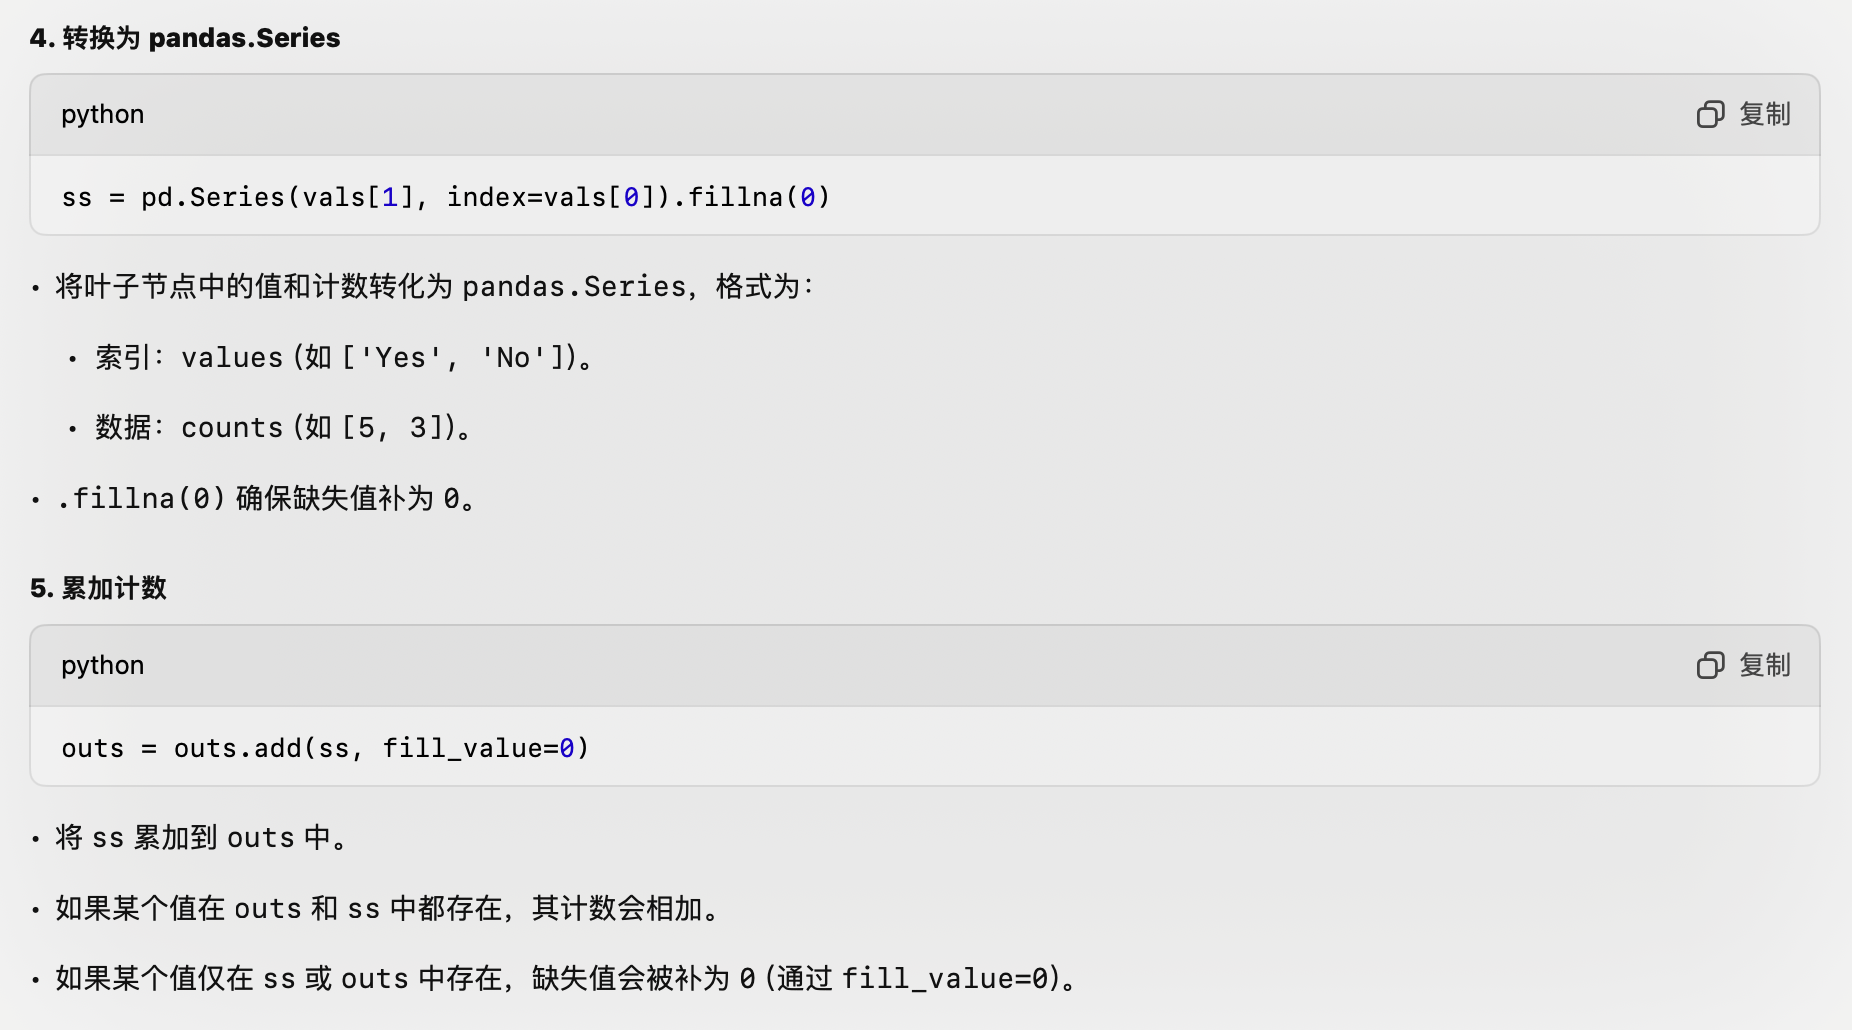

### Turn all the code into a class: DecisionTree
<br>
<font style='font-size:18px; line-height:28px;'>
With all the component ready, it is time to turn all the code into a class, doing so has many benifits:

- to encapsulate all the code in one closure
- to elliminate the global variable outcomeVar
- makes the estimated parameters persistent
- provide standard interface 
</font>

(700, 6) (300, 6)
CPU times: user 549 ms, sys: 14.6 ms, total: 563 ms
Wall time: 554 ms
Accuracy:  70.67%      Recall:    69.93%
Precision: 71.81%      F1 score:  70.86%


pred,True,False
test,,
True,107,46
False,42,105


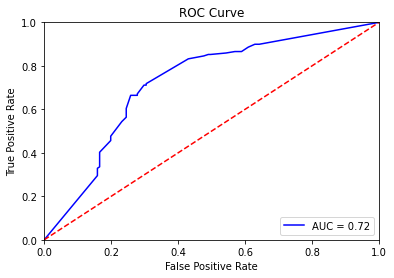

In [285]:
def valueOfMaxProb(vals):
    tarray=np.unique(vals, return_counts=True)
    imax=np.argmax(tarray[1])
    return tarray[0][imax], tarray[1][imax]/vals.shape[0]

def value_count(vals):
    return np.unique(vals, return_counts=True)

class DecisionTree:
    def __init__(self, toPrint=False, LeafNodeContent=value_count):
        self.theTree=dict()
        self.toPrint=toPrint
        self.LeafNodeContent=LeafNodeContent
                     
    def entropy(self,df): ## after a series testing, this is by far the fastest
        tarray=np.unique(df[self.outcomeVar], return_counts=True)
        ent=0.0
        for count in tarray[1]:
            ratio=count/df.shape[0]
            ent+=ratio*math.log(ratio,2)
        return -ent
   
    def trySplit(self,df,attrib):
        ntotal=df.shape[0]
        ent=0.0
        for v, nodei in df.groupby(attrib):
            ent+=float(nodei.shape[0]/ntotal)*self.entropy(nodei)
        return ent

    def getMostInfoGainAttrib(self,df):
        TheEntropy=self.entropy(df)
        InfoGains=pd.Series()
        for v in df.columns:
            if v!=self.outcomeVar:
                InfoGains[v]=TheEntropy-self.trySplit(df,v)
        if self.toPrint: print(InfoGains)
        if len(InfoGains)==0: return None
        return InfoGains.index[InfoGains.argmax()]
                   
    def splitNodes(self, df, treeNode):
        attrib=self.getMostInfoGainAttrib(df)
        if attrib==None: return
        treeNode[attrib]=dict()
        if self.toPrint: print("\n>>>>> split by ",attrib,)
        for v, subdf in df.groupby(attrib):
            theEntropy=self.entropy(subdf)
            if theEntropy!=0 and subdf.shape[1]>2:
                if self.toPrint: 
                    print(attrib, '=',v, theEntropy,'. Calling splitNodes() recursively')
                    print(subdf)
                treeNode[attrib][v]={}
                self.splitNodes(subdf.drop(attrib, axis=1), treeNode[attrib][v])
            else:
                if self.toPrint: print(attrib,'=', v, 'leaf node', [(v.shape[0],k) for k,v in subdf.groupby(self.outcomeVar)])                 
                treeNode[attrib][v]=self.LeafNodeContent(subdf[self.outcomeVar])
        del df

    def fit(self, X_train, y_train):
        self.outcomeVar = y_train.name # store the target col's name
        self.labels=np.unique(y_train) # store the total categories of target labels
        XY_train=X_train.merge(y_train, left_index=True, right_index=True) # merge data and label together
        self.theTree=dict() # initialize the tree
        self.splitNodes(XY_train, self.theTree)  # call the split function to train the tree.
        
    def totalValueCount(self,di):
        outs=pd.Series()  # initialize an empty Series
        for key in di: # for loop of keys
            vals =di[key] # get the values of the key
            if type(vals)==dict: 
                vals=self.totalValueCount(vals)
            ss=pd.Series(vals[1], index=vals[0]).fillna(0)
            outs=outs.add(ss,fill_value=0) #累加
        return list(outs.index), outs.values
        
    def estimate(self, dic, x_test):
        if len(dic)==0: return 
        field=next(iter(dic))
        if field not in x_test: return 
        match=dic[field].get(x_test[field]) 
        if match is None: 
            return self.totalValueCount(dic[field])
        if type(match) is dict:
            if self.toPrint: print(match)  # match is a shorted dictionary so it can be treated just like the dic
            return self.estimate(match, x_test)
        else:
            if self.toPrint: print(match, 'is a leaf of type ', type(match))
            return match

    def predict(self, X_test):
        predicted=[]
        for i in range(X_test.shape[0]):
            pred=self.estimate(self.theTree, X_test.iloc[i,:])
            if pred==None:
                predicted.append(None)
            else:
                imax=np.argmax(pred[1])
                predicted.append(pred[0][imax])
        return np.array(predicted)

    def predict_proba(self, X_test):
        predicted=pd.DataFrame([], columns=self.labels)
        for i in range(X_test.shape[0]):
            pred=self.estimate(self.theTree, X_test.iloc[i,:])
            if pred==None:
                print(i, end=' ')
                row=pd.Series([0]*len(self.labels), index=self.labels)
            else:
                row=pd.Series(pred[1]/pred[1].sum(), index=pred[0])
            predicted=predicted.append(row, ignore_index=True)
        return np.array(predicted.fillna(0))  ## fill the missing with 0


data=pd.read_pickle("../data/malawi_clear.zip")
data=data.iloc[:1000,:]
data=data.reset_index()
selected_columns=['der_hhsize', 'hld_rooms','hld_nbcellpho', 
                  'hld_selfscale', 'hid__101010160033','hid__101010160060']
#selected_columns=['der_nchild10under', 'der_nmalesover10', 'der_nliterate']
X=data[selected_columns]
y=data['poor']

np.random.seed(0)
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3)
print(X_train.shape, X_test.shape)
dt=DecisionTree()  
%time dt.fit(X_train, y_train)
pred=dt.predict(X_test)
prob=dt.predict_proba(X_test)
ConfusionTable(y_test, pred)
#printTree(dt.theTree)
print()
#print(dt.theTree)
roc(y_test, prob[:,1])

In [286]:
#read the tree structure
printTree(dt.theTree)


  der_hhsize:
    1:
      hld_rooms:
        1:
          hld_selfscale:
            1.0:
              hld_nbcellpho:
                0.0:
                  hid__101010160033:
                    0:
                      hid__101010160060:
                        0:(array([False,  True]), array([5, 1])) 
            2.0:(array([False]), array([5])) 
            3.0:(array([False]), array([1])) 
        2:
          hld_selfscale:
            1.0:
              hld_nbcellpho:
                0.0:
                  hid__101010160033:
                    0:
                      hid__101010160060:
                        0:(array([False,  True]), array([8, 4])) 
            2.0:
              hld_nbcellpho:
                0.0:
                  hid__101010160033:
                    0:
                      hid__101010160060:
                        0:(array([False,  True]), array([8, 1])) 
                1.0:(array([False]), array([1])) 
            3.0:(array([False]), array([4])) 

        1.0:
          hld_selfscale:
            1.0:
              hld_rooms:
                4:
                  hid__101010160033:
                    0:
                      hid__101010160060:
                        0:(array([False,  True]), array([1, 1])) 
            2.0:
              hld_rooms:
                2:(array([ True]), array([1])) 
                3:(array([ True]), array([2])) 
                4:
                  hid__101010160033:
                    0:
                      hid__101010160060:
                        0:(array([False,  True]), array([2, 2])) 
            3.0:(array([False]), array([3])) 
        2.0:
          hld_rooms:
            2:(array([ True]), array([1])) 
            3:(array([False]), array([2])) 
            5:(array([False]), array([2])) 
        3.0:(array([False]), array([2])) 
    9:
      hld_rooms:
        2:(array([ True]), array([1])) 
        3:(array([ True]), array([7])) 
        4:
          hld_nbcellpho:
            0.0: